In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
sns.set_style('whitegrid')

In [29]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
df.shape

(891, 12)

### Findings:
- The dataset contains 891 rows and 12 columns.

In [31]:
print("\n--- Info ---")
df.info


--- Info ---


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

### Findings:
- The dataset contains 891 rows and 12 columns.
- Missing values are present in `Age`, `Cabin`, and `Embarked`.
- Data types are appropriate for most columns, though `Pclass` is numeric but categorical in nature.


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Findings:
- `Age` has a mean of ~30 years, but some values are missing.
- `Fare` varies widely, with a maximum over 500, indicating outliers.
- `Survived` shows imbalance: more deaths than survivors.


In [33]:
print("\n--- Categorical summary ---")
df.describe(include="object")



--- Categorical summary ---


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [34]:
df.value_counts('Sex')

Sex
male      577
female    314
Name: count, dtype: int64

In [35]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df.value_counts('Parch')

Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: count, dtype: int64

In [37]:
df.value_counts('SibSp')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

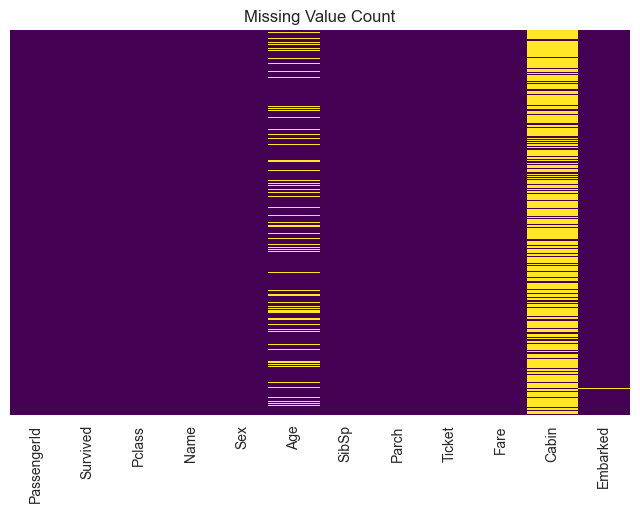

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing Value Count")
plt.show()

### Findings:
- The `Cabin` column has a very high number of missing values (almost 80%).
- The `Age` column has a moderate amount of missing values (~20%).
- A few rows have missing values in the `Embarked` column.
- Other columns are mostly complete with no missing data.

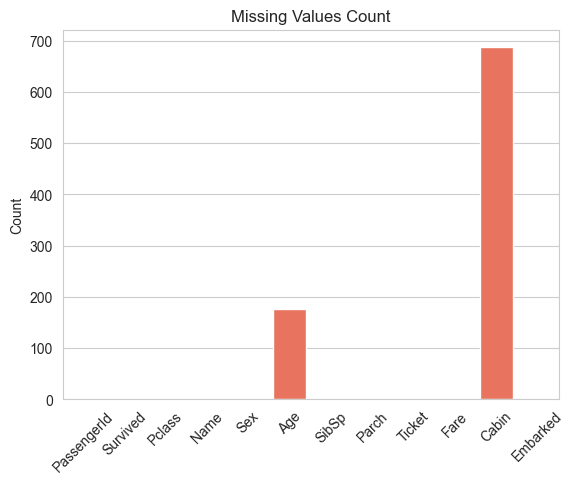

In [40]:
sns.barplot(df.isna().sum(), color='tomato')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Missing Values Count")
plt.show()

### Findings:
- `Cabin` has the highest number of null values.
- `Age` has the second highest count of missing values.
- `Embarked` has very few missing values.
- All other columns have no missing data.


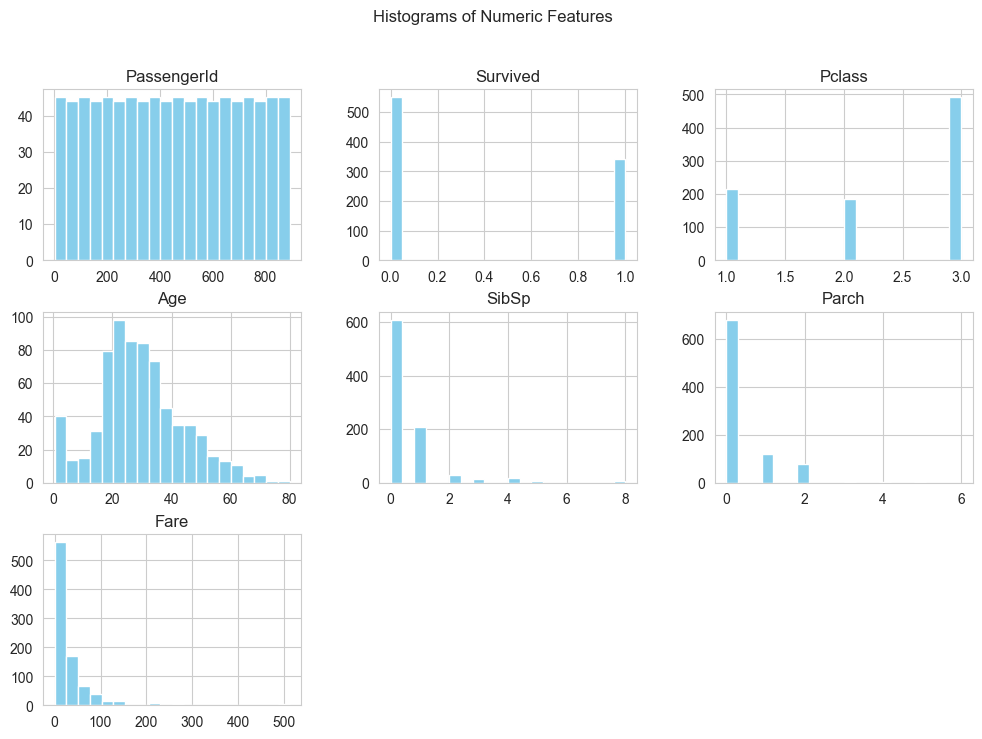

In [41]:
df.hist(bins=20, figsize=(12,8), color="skyblue")
plt.suptitle("Histograms of Numeric Features")
plt.show()

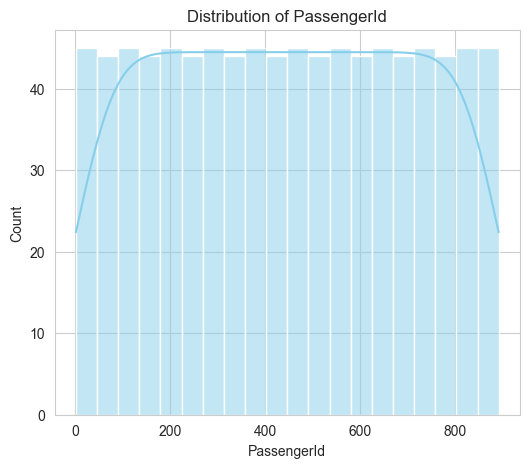

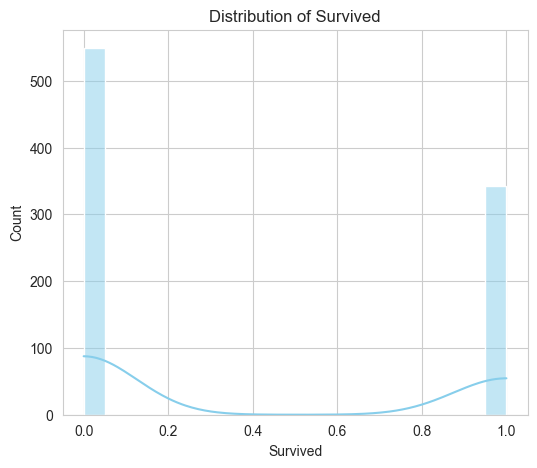

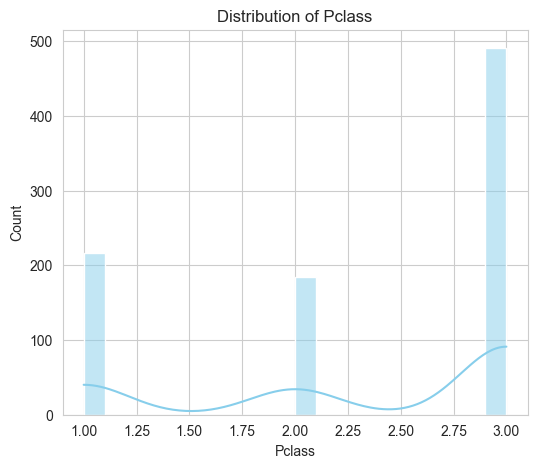

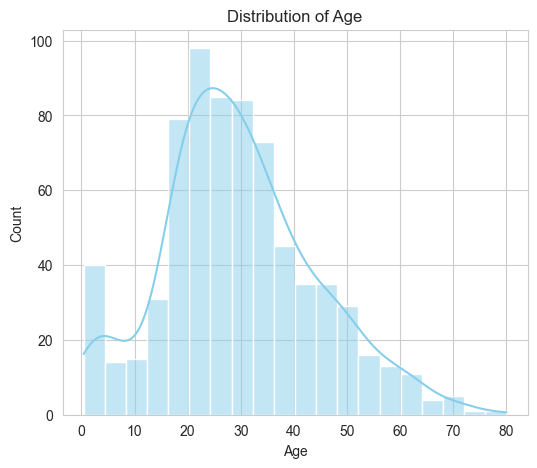

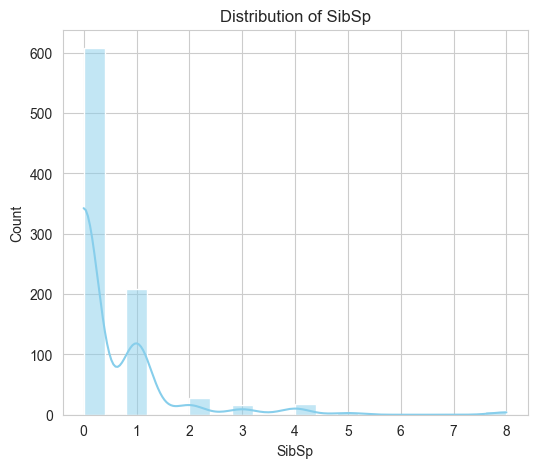

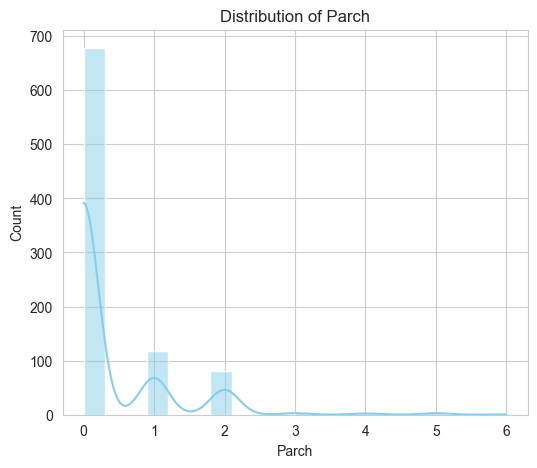

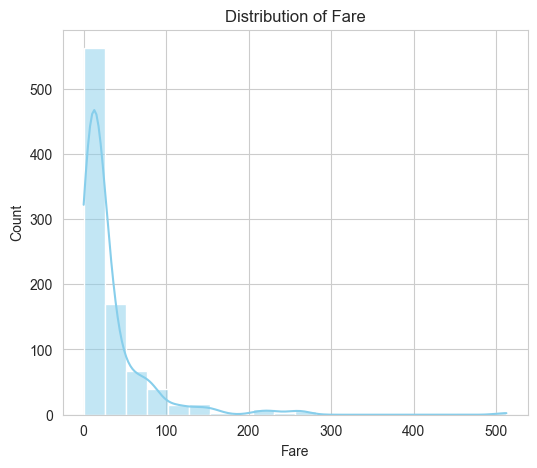

In [42]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,5))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()


### Findings:
- **Age**: Most passengers were between 20–40 years old. Distribution is roughly normal, with fewer children and elderly.
- **Fare**: Positively skewed with many low fares (<50) and some extreme outliers (>500).
- **SibSp (Siblings/Spouses Aboard)**: Most passengers traveled alone (0), with very few having more than 3 family members aboard.
- **Parch (Parents/Children Aboard)**: Majority had 0 parents/children aboard; only a small number had 1–2.
- Overall, numerical features show skewness and outliers that are important for feature engineering.

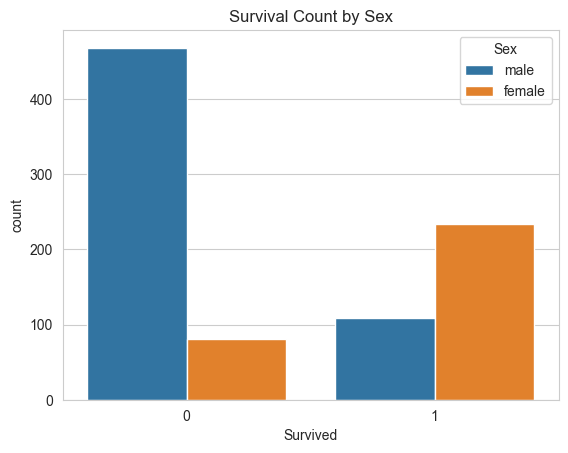

In [43]:
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title('Survival Count by Sex')
plt.show()

### Findings:
- Female survival rate is ~74%, while male survival rate is only ~19%.
- Gender was a critical factor in survival chances.


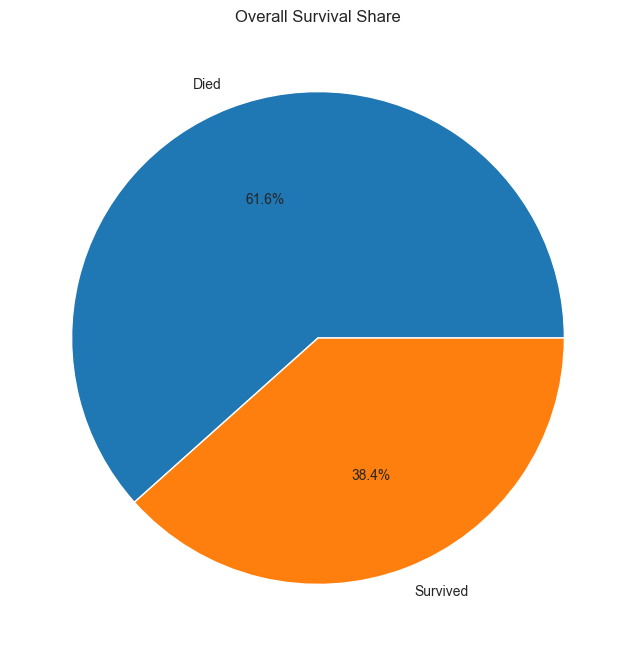

In [44]:
plt.figure(figsize=(8,8))
df['Survived'].value_counts().rename({0:"Died",1:"Survived"}).plot.pie(autopct='%1.1f%%',ylabel="")
plt.title("Overall Survival Share")
plt.show()

### Findings:
- About 62% of passengers did not survive.
- Only ~38% of passengers survived.

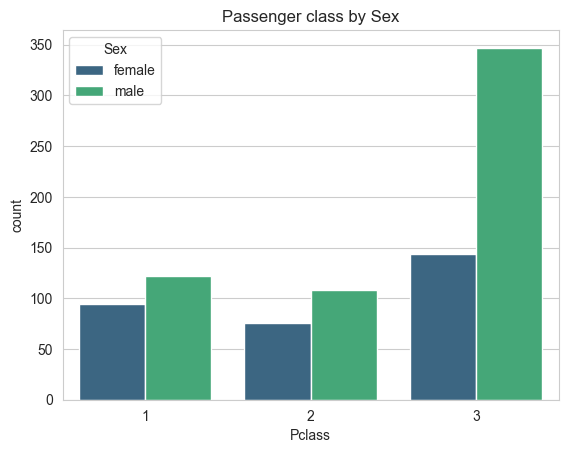

In [45]:
sns.countplot(x='Pclass', data=df, hue='Sex', palette= 'viridis')
plt.title('Passenger class by Sex')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

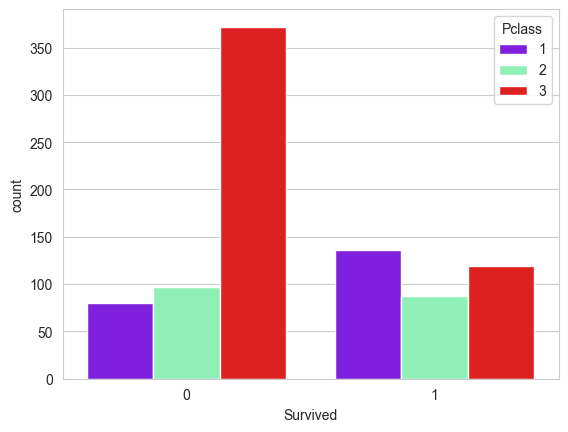

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

### Findings:
- Most passengers traveled in 3rd class, followed by 1st and 2nd class.
- 3rd class passengers form the largest group but had the lowest survival rates.

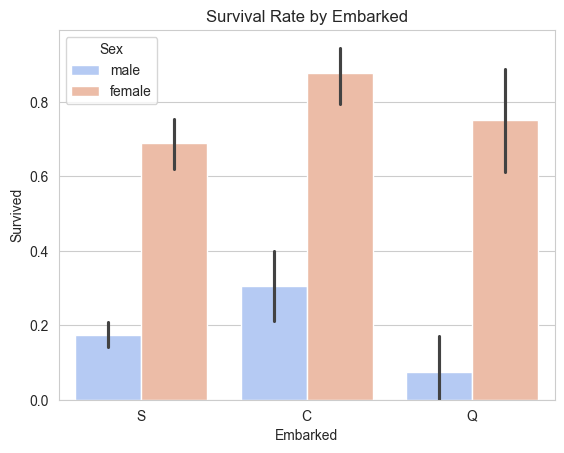

In [47]:
sns.barplot(df, x ='Embarked', y='Survived',hue='Sex', palette= 'coolwarm')
plt.title('Survival Rate by Embarked')
plt.show()

### Findings:
- Majority of passengers embarked from Southampton (S).
- Smaller groups embarked from Cherbourg (C) and Queenstown (Q).


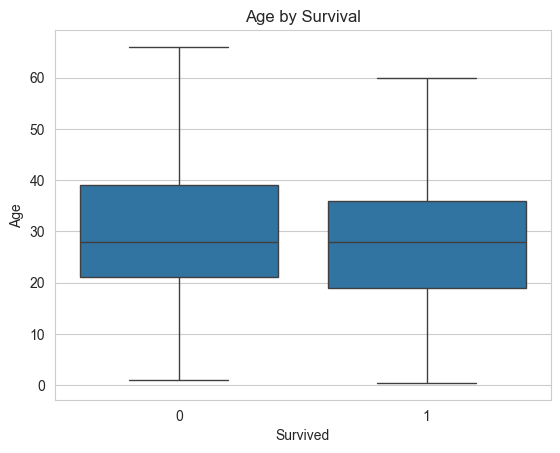

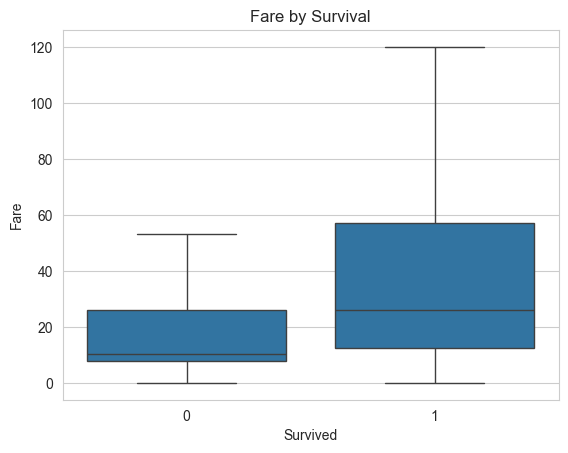

In [48]:
for col in ["Age","Fare"]:
    plt.figure()
    sns.boxplot(x="Survived", y=col, data=df, showfliers=False)
    plt.title(f"{col} by Survival")
    plt.show()

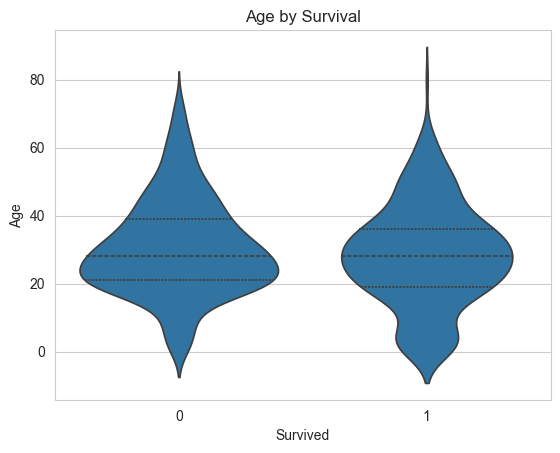

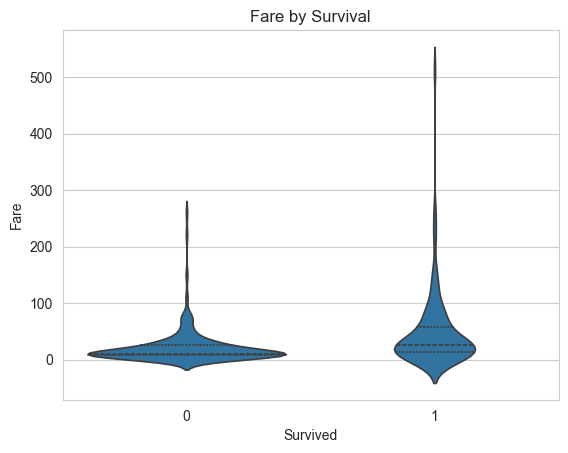

In [49]:
for col in ['Age','Fare']:
    plt.figure()
    sns.violinplot(df,x='Survived', y=col, inner='quartile')
    plt.title(f"{col} by Survival")

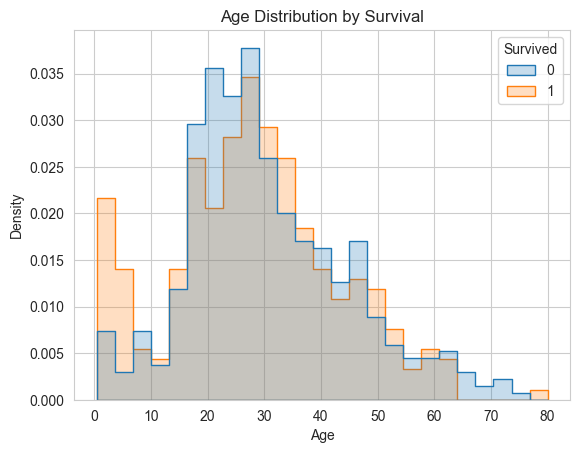

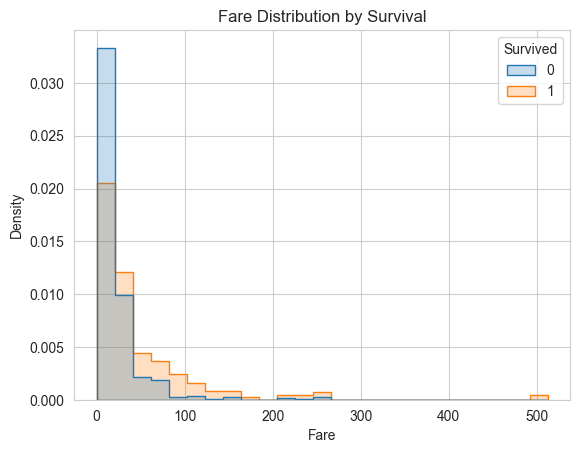

In [50]:
for col in ["Age","Fare"]:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Survived", bins=25, element="step", stat="density", common_norm=False)
    plt.title(f"{col} Distribution by Survival")
    plt.show() 

### Findings:
# Age
- Children had better survival rates compared to adults.
- Survival chances declined with age after ~40.

# Fare
- Majority of fares were low (<50).
- A few passengers paid very high fares (outliers >500).
- High fare is associated with higher survival (wealthier passengers).


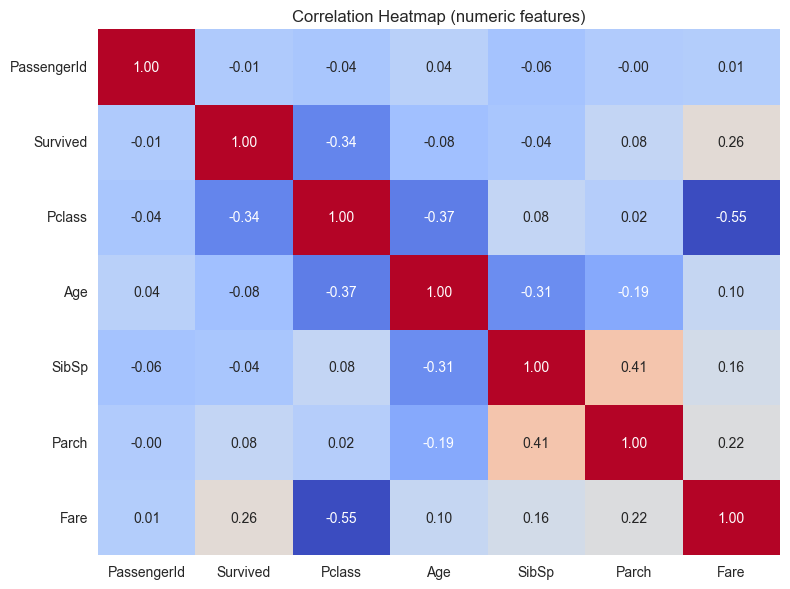

In [51]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()


### Findings:
- `Fare` and `Pclass` are negatively correlated (higher class = higher fare).
- `Survived` is moderately correlated with `Sex` and `Pclass`.
- Other numeric variables show weak correlation with survival.


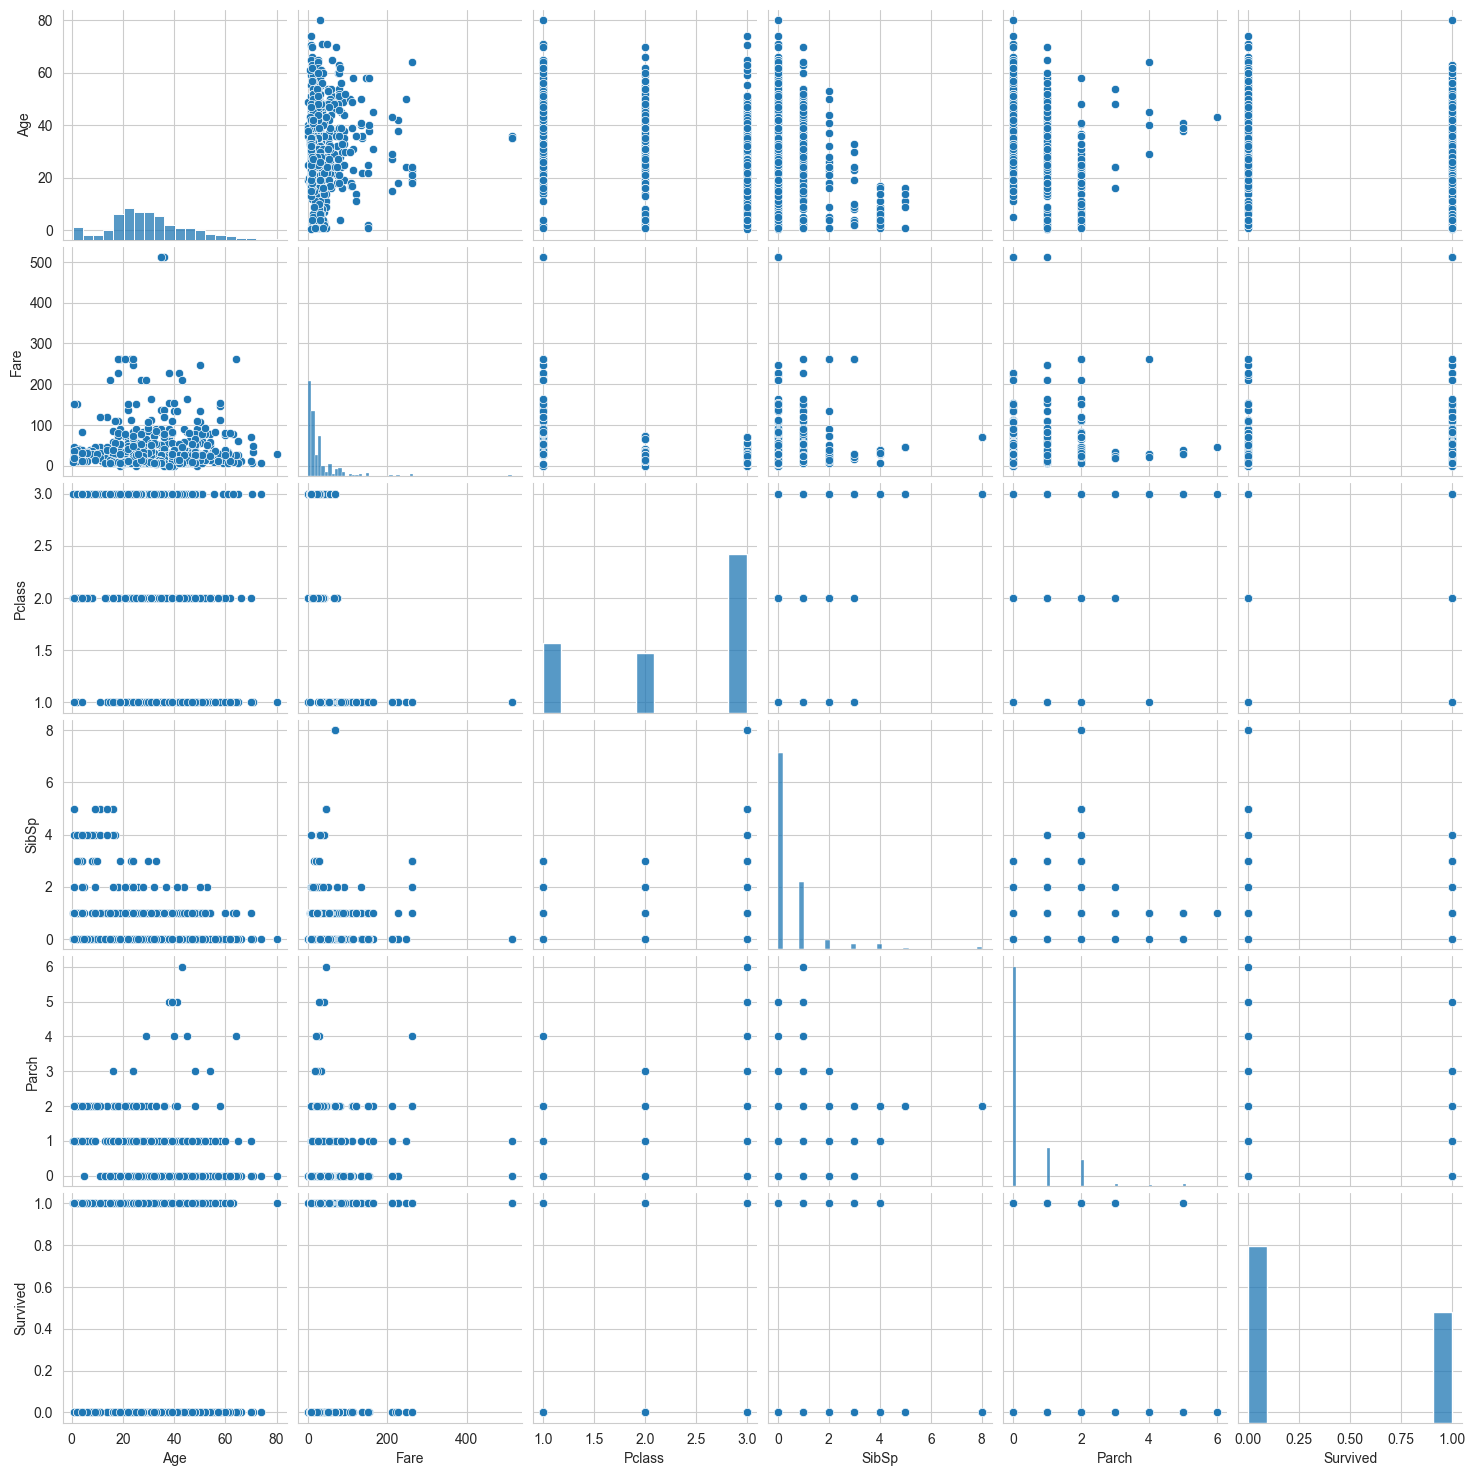

In [52]:
sns.pairplot(df[["Age","Fare","Pclass","SibSp","Parch","Survived"]],diag_kind='hist')
plt.show()

### Findings:
- Clear visual separation: higher survival among females and higher-class passengers.
- Survivors cluster in high fare and 1st class regions.
- Most 3rd class passengers did not survive.


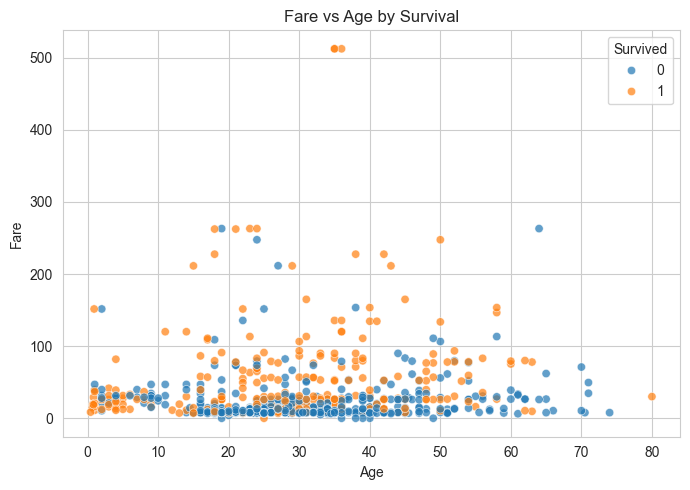

In [53]:
# if all(c in df.columns for c in ["Age","Fare","Survived"]):
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived",alpha=0.7)
plt.title("Fare vs Age by Survival")
plt.tight_layout()
plt.show()

### Findings:
- `Fare` has extreme outliers (very high-ticket passengers).
- `Age` distribution is mostly normal with a few elderly outliers.
- Outliers are important for modeling decisions.


### Final Summary:
- Women and children had the highest survival rates.
- 1st class passengers had a clear survival advantage.
- Passengers from Cherbourg (C) had better chances of survival compared to Southampton (S).
- Survival depended strongly on **gender, class, and fare**.
- Outliers (especially in fare) and missing data (Age, Cabin, Embarked) are important data quality issues.
